In [1]:
# Import packages required for project

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in the data

df=pd.read_csv(r'/Users/danyfarias/Desktop/Portfolio Projects/Project #4/movies.csv')

In [2]:
#View data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#check for missing data/Nulls

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# data type for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#clean currency columns data types
#In looking at the captured columns there are some non-numeric values that need to be sorted before data type 
    # change can occur. 
    
# Replace NaN and inf with a default value, e.g., 0 in both Budget & Gross Columns
df['budget'].fillna(0, inplace=True)  # Replace NaN with 0
df.replace([np.inf, -np.inf], 0, inplace=True)  # Replace inf with 0

df['gross'].fillna(0, inplace=True)  # Replace NaN with 0
df.replace([np.inf, -np.inf], 0, inplace=True)  # Replace inf with 0

# Convert 'budget' column to integer
df['budget'] = df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
#Check current state of data types after converting types.

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [8]:
#correct year column as released date years do not always match year column.

# Remove "(United States)" from 'released' column, found that there is more string in paren so adjusted code below.
#atmp1: df['released'] = df['released'].str.replace(r'\s*\(United States\)', '')

df['released'] = df['released'].str.replace(r'\s*\([^)]*\)', '')

df['yearcorrected']=df['released'].astype(str).str[-4:]
df.head()

/var/folders/mb/fmhzdctd7pn64c7dx37vjyg40000gn/T/ipykernel_2124/738639665.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released'] = df['released'].str.replace(r'\s*\([^)]*\)', '')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [10]:
#expand row view 
#pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
#Look for dups and drop if any, No dups exists as row count remains equal on current df to prior df.

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
#Budget & Company - High Correlation to Revenue?


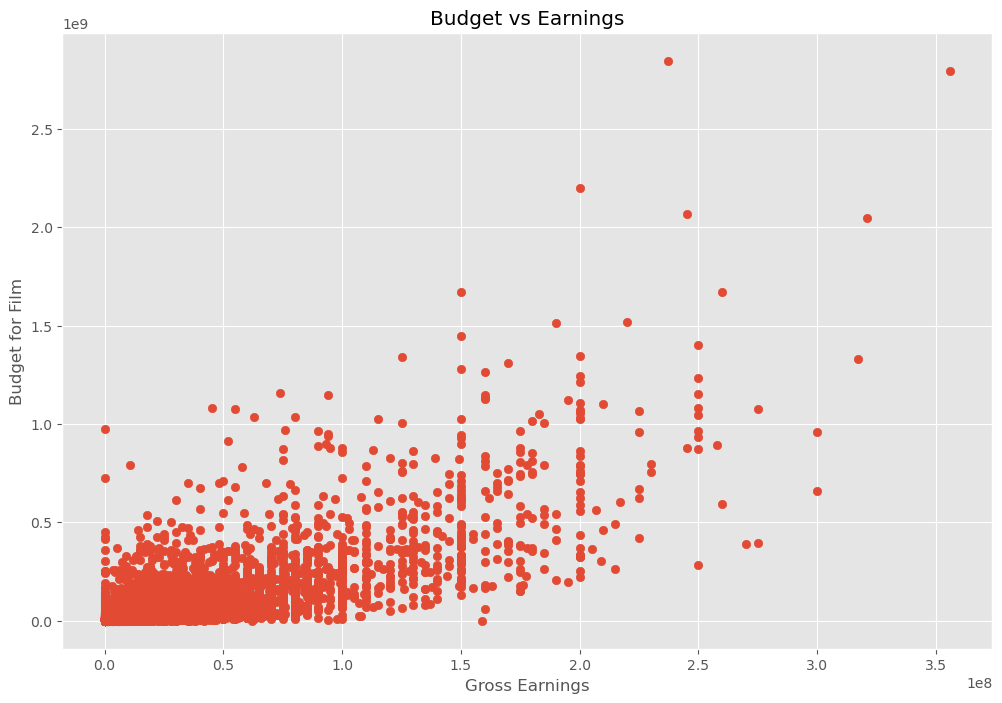

In [14]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()


In [15]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

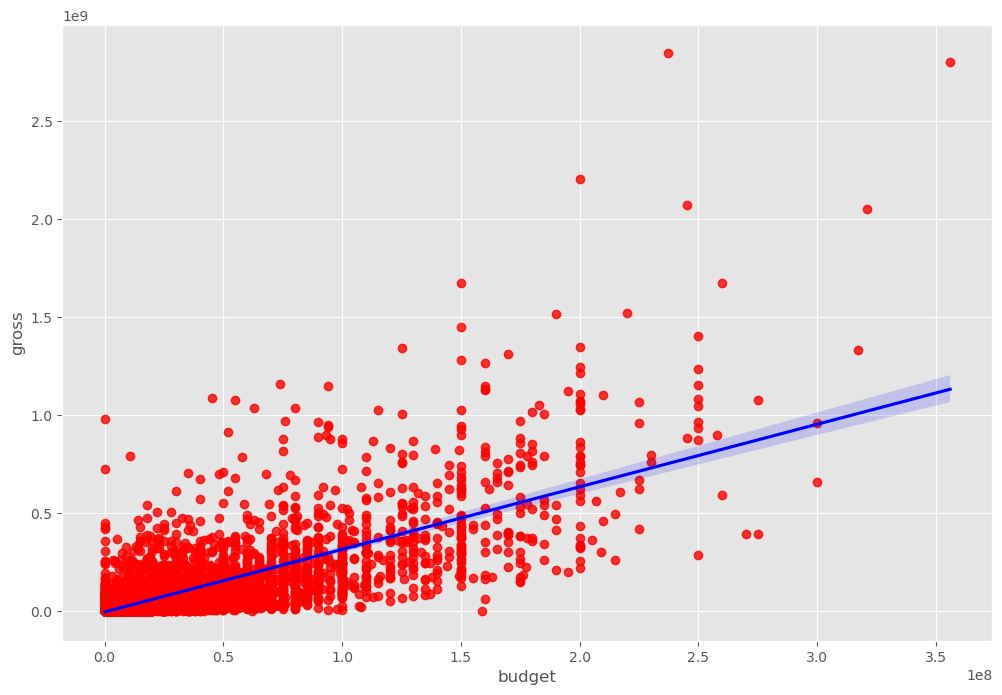

In [16]:
#plot budget versus gross using seaborn, shows correlation, but how much?

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [17]:
#looking at correlation only numeric fields when using .corr Correlation Methods: Pearson, kendall, spearman

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [18]:
#High correlation between budget and gross - Correct assumption

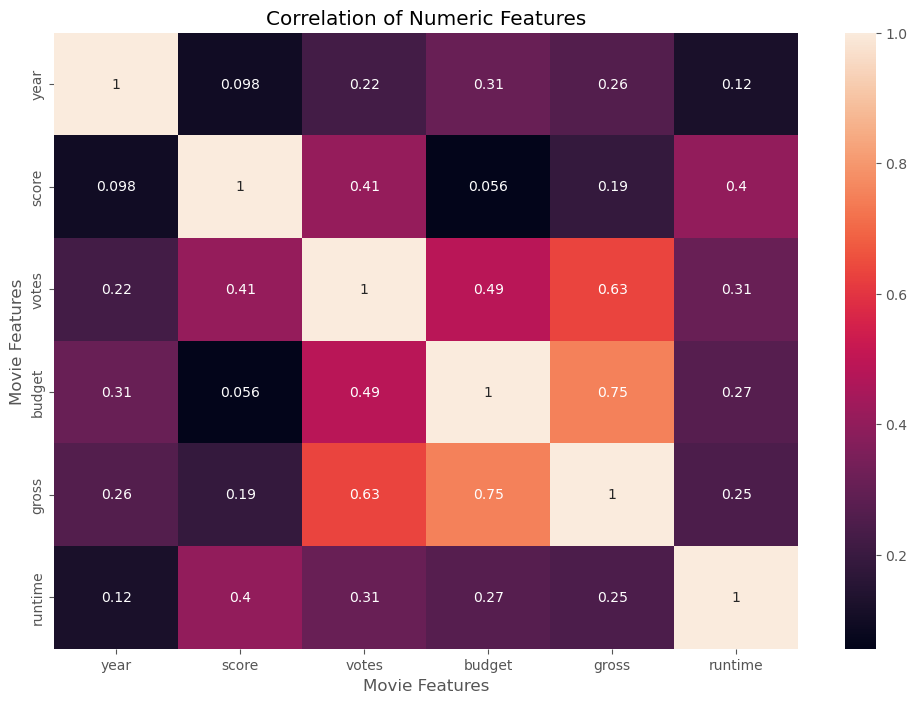

In [19]:
#Visualize Table above

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation of Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [20]:
# Look at company correlation 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [21]:
#Loop & Convert company to object type to evaluate correlation

df_num=df

for col_name in df_num.columns:
    if(df_num[col_name].dtype== 'object'):
        df_num[col_name]= df_num[col_name].astype('category')
        df_num[col_name]= df_num[col_name].cat.codes

df_num.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,533,5,0,2009,610,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,153,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,616,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [22]:
#Prior version of frame will displays with original string field rerun base table to capture in below output.

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,533,5,0,2009,610,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,153,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,616,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


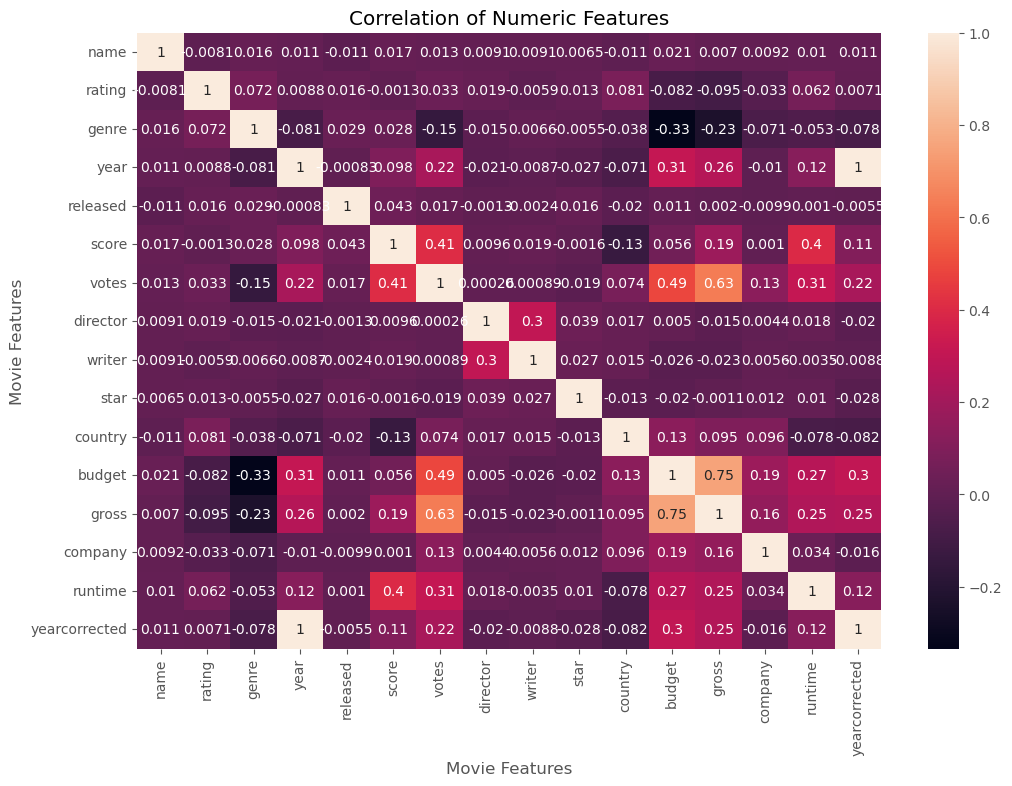

In [23]:
#Visualize Table above

correlation_matrix = df_num.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation of Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [24]:
df_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
name,1.000000,-0.008069,0.016355,0.011453,-0.011223,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.015735,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029039,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000832,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.997295
released,-0.011223,0.015735,0.029039,-0.000832,1.000000,0.042918,0.017111,-0.001275,-0.002421,0.015597,-0.020063,0.010643,0.002010,-0.009933,0.000997,-0.005538
score,0.017097,-0.001314,0.027965,0.097995,0.042918,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.017111,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001275,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002421,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015597,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027576


In [25]:
correlation_mat = df_num.corr()
corrs_pairs=correlation_mat.unstack()

corrs_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011223
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.020548
               gross            0.006989
               company          0.009211
               runtime          0.010392
               yearcorrected    0.011134
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.015735
               score           -0.001314
               votes            0.033225
               director         0.019483
               w

In [26]:
sorted_pairs= corrs_pairs.sort_values()
sorted_pairs

genre          budget          -0.334021
budget         genre           -0.334021
gross          genre           -0.234297
genre          gross           -0.234297
votes          genre           -0.145307
genre          votes           -0.145307
score          country         -0.133348
country        score           -0.133348
rating         gross           -0.095450
gross          rating          -0.095450
country        yearcorrected   -0.082274
yearcorrected  country         -0.082274
rating         budget          -0.081939
budget         rating          -0.081939
year           genre           -0.081261
genre          year            -0.081261
country        runtime         -0.078412
runtime        country         -0.078412
yearcorrected  genre           -0.077550
genre          yearcorrected   -0.077550
               company         -0.071067
company        genre           -0.071067
year           country         -0.070938
country        year            -0.070938
genre          r

In [27]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross          votes            0.632834
votes          gross            0.632834
budget         gross            0.750157
gross          budget           0.750157
year           yearcorrected    0.997295
yearcorrected  year             0.997295
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
dtype: float64

In [28]:
##company does not have a high correlation, however gross and votes have the highest correlation to gross earnings.